In [4]:
import os
import shutil
from google.colab import files
files.upload()  # This will prompt you to upload the kaggle.json file
# Create the Kaggle folder
os.makedirs("/root/.kaggle", exist_ok=True)

# Move kaggle.json to the correct location
shutil.move("kaggle.json", "/root/.kaggle/kaggle.json")

# Set permissions to avoid warnings
os.chmod("/root/.kaggle/kaggle.json", 600)

Saving kaggle.json to kaggle.json


In [30]:
!kaggle datasets download -d priyamchoksi/credit-card-transactions-dataset


Dataset URL: https://www.kaggle.com/datasets/priyamchoksi/credit-card-transactions-dataset
License(s): apache-2.0
credit-card-transactions-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [31]:
import zipfile

# Unzipping the dataset
dataset_zip = "credit-card-transactions-dataset.zip"
with zipfile.ZipFile(dataset_zip, 'r') as zip_ref:
    zip_ref.extractall("dataset")

# List extracted files
os.listdir("dataset")

['credit_card_transactions.csv']

In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
data = pd.read_csv('/content/dataset/credit_card_transactions.csv', header=0)

data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 24 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [33]:
data.head(5)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,merch_zipcode
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,28705.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,NaN
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,83236.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,NaN
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,22844.0


2.1. Columns and Their Descriptions¶

    trans_date_trans_time: Timestamp of the transaction.
    cc_num: Credit card number (encrypted).
    merchant: The store or vendor where the transaction occurred.
    category: Transaction category (e.g., groceries, entertainment).
    amt: Transaction amount.
    first: Cardholder's first name.
    last: Cardholder's last name.
    gender: Cardholder's gender.
    street: Street where the cardholder resides.
    city: City where the cardholder resides.
    state: State where the cardholder resides.
    zip: Postal code of the cardholder.
    lat: Latitude of the cardholder's address.
    long: Longitude of the cardholder's address.
    city_pop: Population of the city where the transaction occurred.
    job: Cardholder's occupation.
    dob: Cardholder's date of birth.
    trans_num: Unique transaction number.
    unix_time: Unix timestamp of the transaction.
    merch_lat: Latitude of the merchant's location.
    merch_long: Longitude of the merchant's location.
    is_fraud: Indicates whether the transaction is fraudulent. This is the target feature I will predict.
    merch_zipcode: Merchant's postal code.


EDA

In [34]:
#Let's check the size of our dataset.
print(f"Number of rows: {data.shape[0]}")
print(f"Number of columns: {data.shape[1]}")

Number of rows: 1296675
Number of columns: 24


In [35]:
data_types = pd.DataFrame(data.dtypes).reset_index()
data_types.columns = ['Feature Name', 'Data Type']
data_types

,Feature Name,Data Type
0,Unnamed: 0,int64
1,trans_date_trans_time,object
2,cc_num,int64
3,merchant,object
4,category,object
5,amt,float64
6,first,object
7,last,object
8,gender,object
9,street,object


In [36]:


# Examining if there is any missing data.

missing_counts = data.isnull().sum()
missing_counts_df = pd.DataFrame(missing_counts).reset_index()
missing_counts_df.columns = ['Feature', 'Missing Value Count']
missing_counts_df

,Feature,Missing Value Count
0,Unnamed: 0,0
1,trans_date_trans_time,0
2,cc_num,0
3,merchant,0
4,category,0
5,amt,0
6,first,0
7,last,0
8,gender,0
9,street,0


In [37]:
# Checking the number of unique values in each column.

unique_counts = data.nunique()
unique_counts_df = pd.DataFrame(unique_counts).reset_index()
unique_counts_df.columns = ['Feature', 'Number of Unique Values']
unique_counts_df

,Feature,Number of Unique Values
0,Unnamed: 0,1296675
1,trans_date_trans_time,1274791
2,cc_num,983
3,merchant,693
4,category,14
5,amt,52928
6,first,352
7,last,481
8,gender,2
9,street,983


## Visualisation

In [38]:
# Let's check if there is any duplications.
print(f'Number of duplicated rows: {data.duplicated().sum()}')

Number of duplicated rows: 0


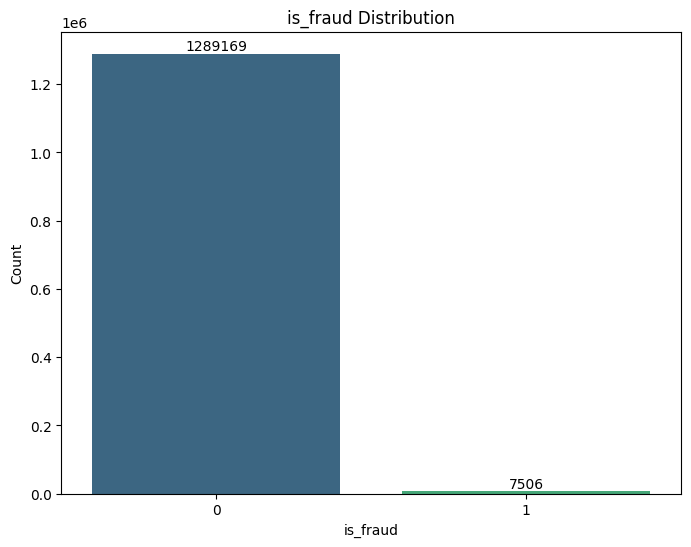

In [39]:
#Visualization of the distribution of the is_fraud column indicating fraud.

plt.figure(figsize=(8, 6))
ax = sns.countplot(x='is_fraud', data=data, palette='viridis')
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom',
                fontsize=10, color='black')
plt.title('is_fraud Distribution')
plt.xlabel('is_fraud')
plt.ylabel('Count')
plt.show()

 dataset has a quite imbalanced distribution. Only the 7506 of the data (% 0.58) are fraduent.

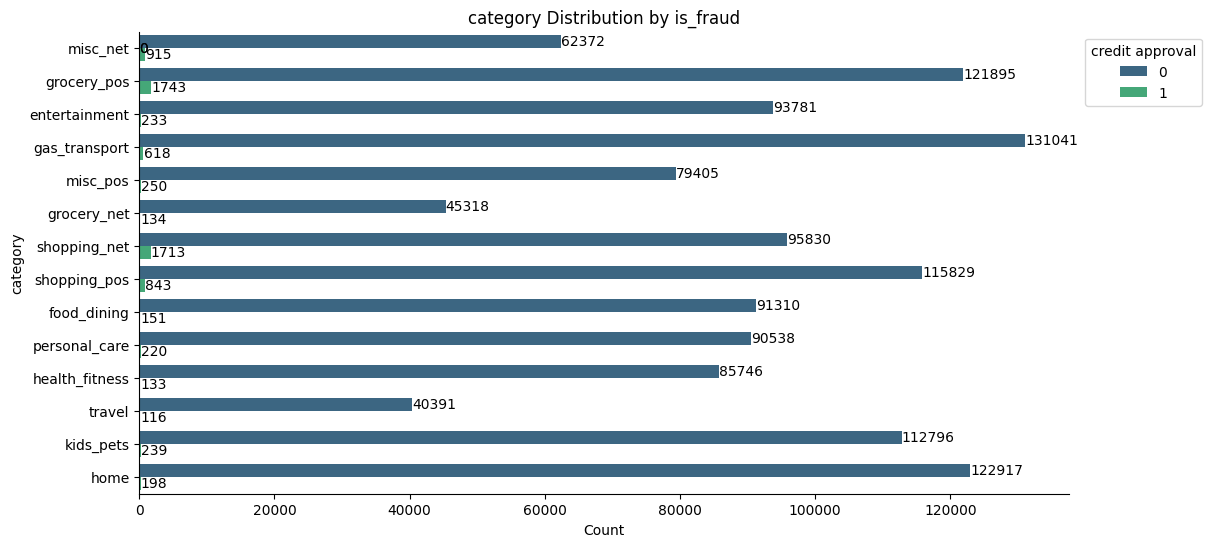

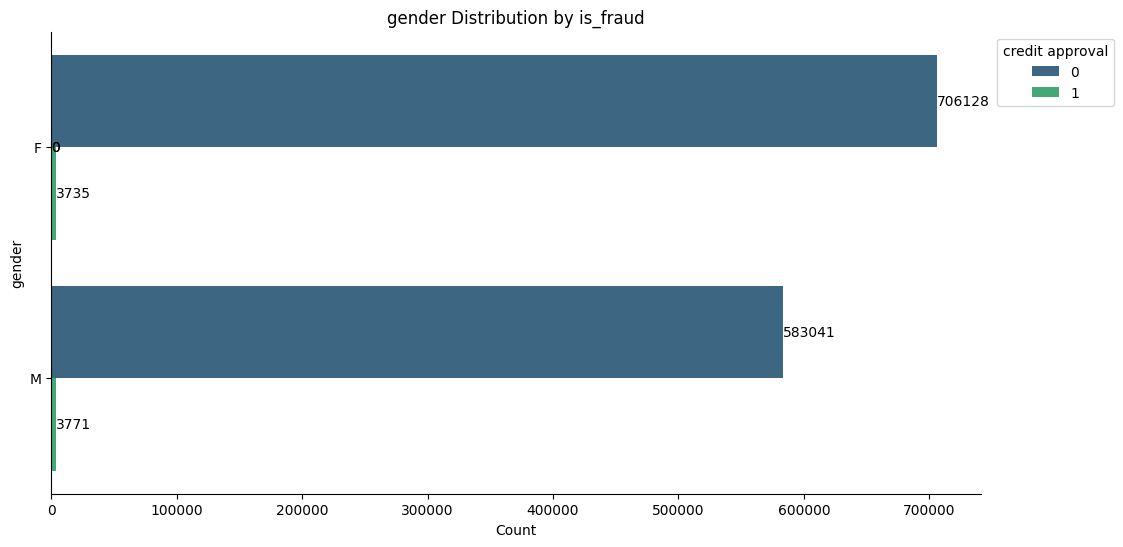

In [40]:
categorical_columns = ['category', 'gender']

for column in categorical_columns:
    plt.figure(figsize=(12, 6))
    ax = sns.countplot(y=column, hue='is_fraud', data=data, palette='viridis')
    plt.title(f'{column} Distribution by is_fraud')
    plt.xlabel('Count')
    plt.ylabel(column)
    plt.legend(title='credit approval', loc='upper right', bbox_to_anchor=(1.15, 1))
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(True)
    ax.spines['bottom'].set_visible(True)

    for p in ax.patches:
        width = p.get_width()
        ax.text(width + 10, p.get_y() + p.get_height() / 2,
                f'{int(width)}',
                ha='left', va='center')

    plt.show()

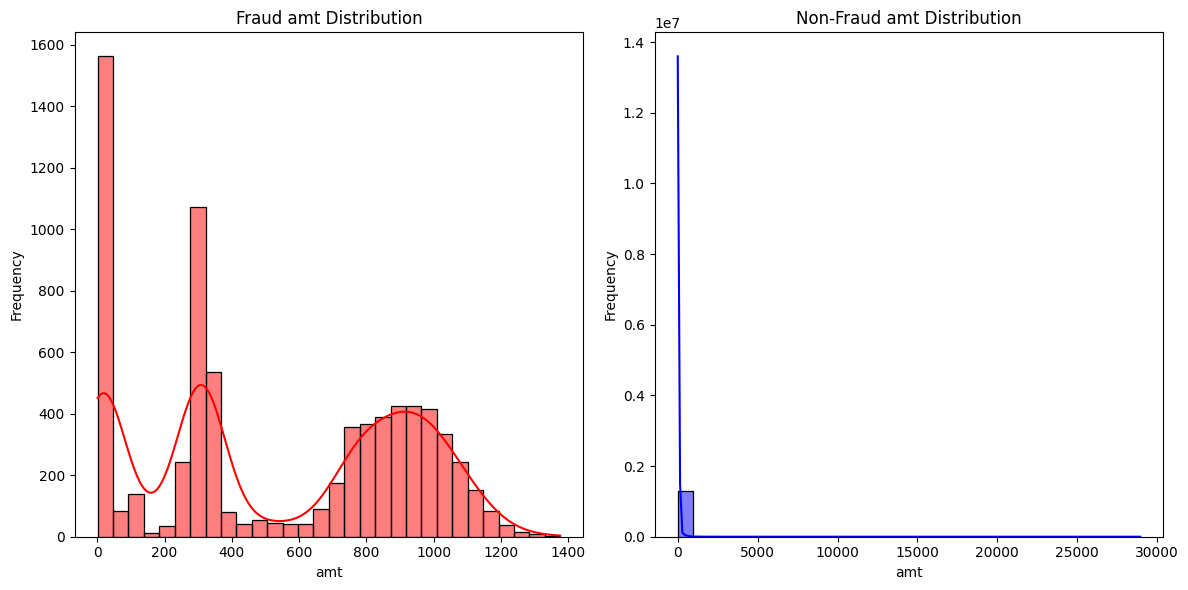

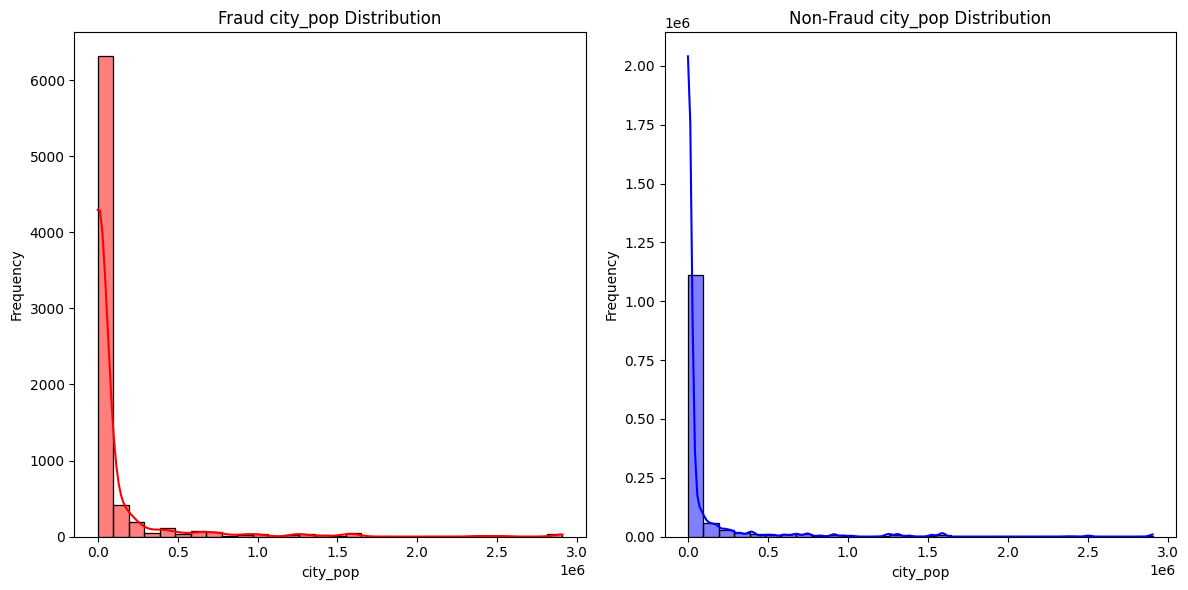

In [16]:
numeric_columns = ['amt', 'city_pop']

for column in numeric_columns:
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    sns.histplot(data[data['is_fraud'] == 1][column], bins=30, kde=True, color='red')
    plt.title(f'Fraud {column} Distribution')
    plt.xlabel(column)
    plt.ylabel('Frequency')

    plt.subplot(1, 2, 2)
    sns.histplot(data[data['is_fraud'] == 0][column], bins=30, kde=True, color='blue')
    plt.title(f'Non-Fraud {column} Distribution')
    plt.xlabel(column)
    plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()



Visualizing monthly and yearly fraud transactions.


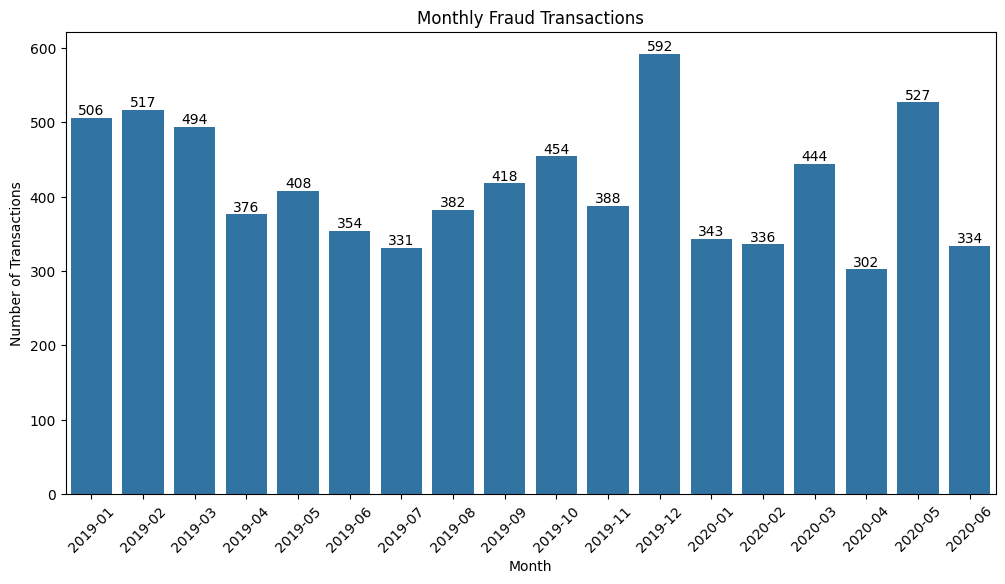

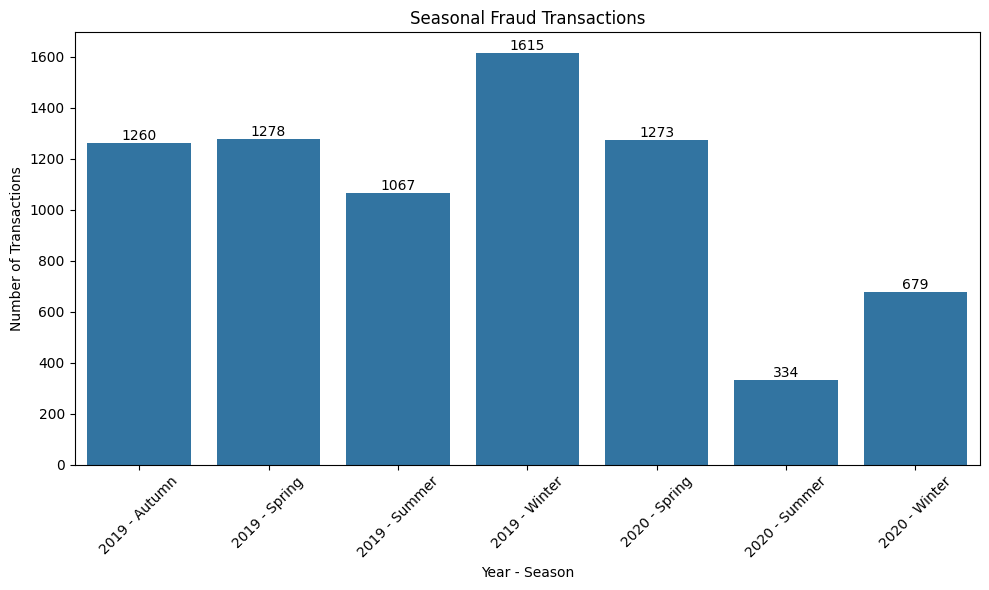

In [17]:
data_copy = data.copy()
fraud_transactions = data_copy[data_copy['is_fraud'] == 1]
non_fraud_transactions = data_copy[data_copy['is_fraud'] == 0]

fraud_transactions['trans_date_trans_time'] = pd.to_datetime(fraud_transactions['trans_date_trans_time'])
monthly_counts = fraud_transactions['trans_date_trans_time'].dt.to_period('M').value_counts().sort_index()
fraud_transactions['season'] = fraud_transactions['trans_date_trans_time'].dt.month % 12 // 3 + 1
fraud_transactions['year'] = fraud_transactions['trans_date_trans_time'].dt.year
fraud_transactions['year_season'] = fraud_transactions['year'].astype(str) + ' - ' + fraud_transactions['season'].map({1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Autumn'})
seasonal_counts = fraud_transactions['year_season'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
sns.barplot(x=monthly_counts.index.astype(str), y=monthly_counts.values)
plt.title('Monthly Fraud Transactions')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)

for i, count in enumerate(monthly_counts.values):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x=seasonal_counts.index, y=seasonal_counts.values)
plt.title('Seasonal Fraud Transactions')
plt.xlabel('Year - Season')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)

for i, count in enumerate(seasonal_counts.values):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.tight_layout()
plt.show()



Interestingly, there were no fraudulent transactions at all during the autumn of 2020.
 Let's observe which hours have a higher occurrence of fraudulent transactions.




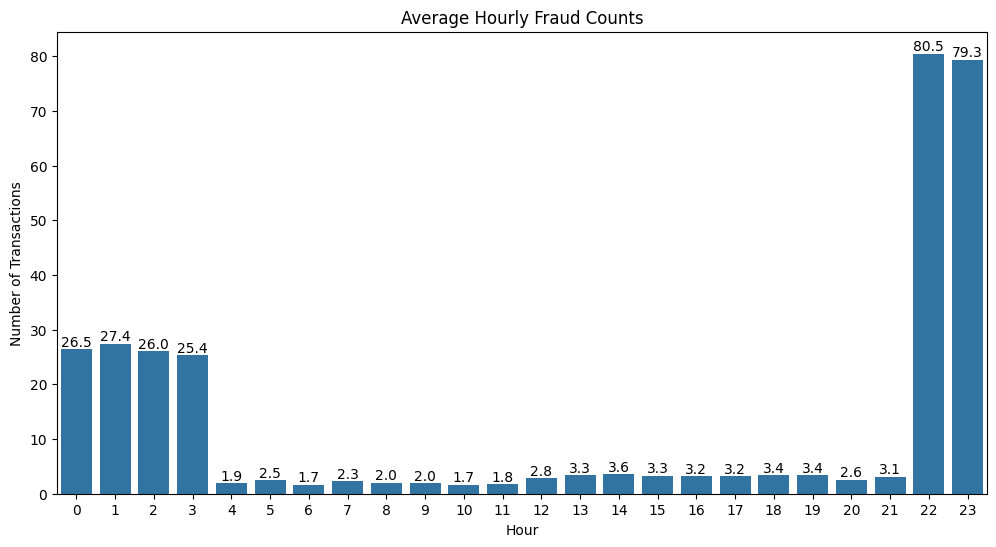

In [18]:


fraud_transactions['hour'] = fraud_transactions['trans_date_trans_time'].dt.hour
hourly_fraud_counts = fraud_transactions['hour'].value_counts().sort_index()
average_hourly_fraud_counts = hourly_fraud_counts / fraud_transactions['hour'].value_counts().count()

plt.figure(figsize=(12, 6))
sns.barplot(x=average_hourly_fraud_counts.index, y=average_hourly_fraud_counts.values)
plt.title('Average Hourly Fraud Counts')
plt.xlabel('Hour')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=0)

for i, count in enumerate(average_hourly_fraud_counts.values):
    plt.text(i, count, f"{count:.1f}", ha='center', va='bottom')

plt.show()



As you can see, a large majority of fraudulent activities occurred between 22:00 and 03:59, particularly between 22:00 and 23:59.

Calculating and visualising the average number of fraud transactions for each day of the week.

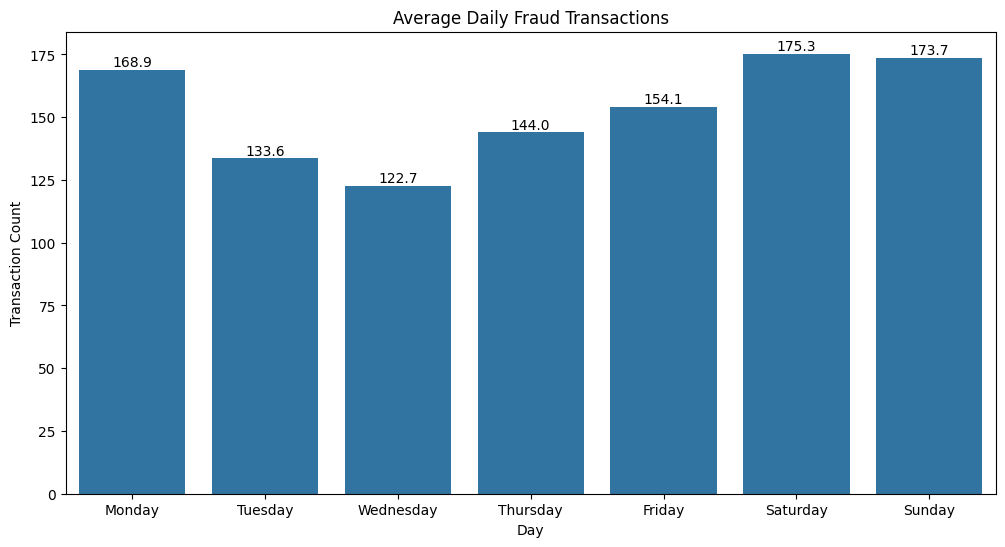

In [19]:
fraud_transactions['weekday'] = fraud_transactions['trans_date_trans_time'].dt.weekday
weekday_fraud_counts = fraud_transactions['weekday'].value_counts().sort_index()
average_weekday_fraud_counts = weekday_fraud_counts / fraud_transactions['weekday'].value_counts().count()
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

plt.figure(figsize=(12, 6))
sns.barplot(x=average_weekday_fraud_counts.index, y=average_weekday_fraud_counts.values)
plt.title('Average Daily Fraud Transactions')
plt.xlabel('Day')
plt.ylabel('Transaction Count')
plt.xticks(ticks=average_weekday_fraud_counts.index, labels=days_of_week, rotation=0)

# Her çubuğun üzerine ortalama değeri ekle
for i, count in enumerate(average_weekday_fraud_counts.values):
    plt.text(i, count, f"{count:.1f}", ha='center', va='bottom')

plt.show()

Data Manupilation

data points above a certain amt value as outliers and remove them.

To examine the structure of the amt column and decide on a suitable threshold, I need to plot a scatterplot.

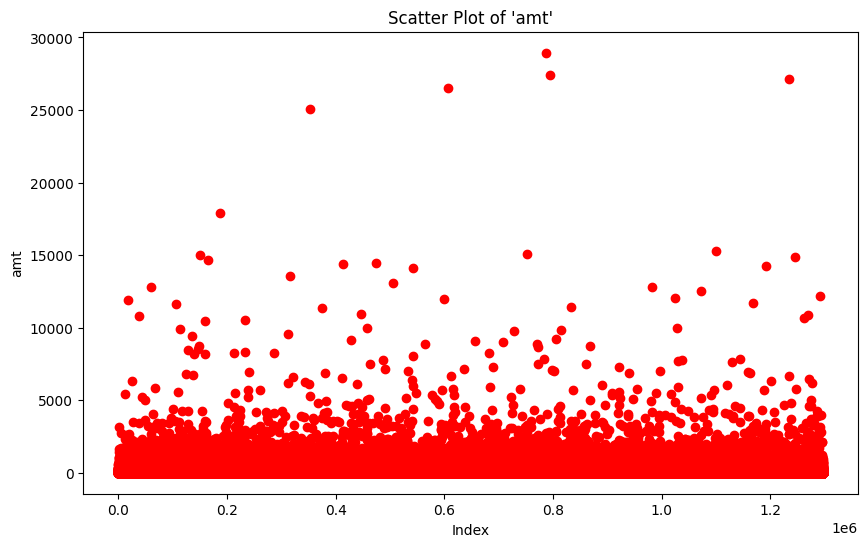

In [20]:
plt.figure(figsize=(10, 6))
plt.scatter(data.index, data['amt'], color='red')
plt.title("Scatter Plot of 'amt'")
plt.xlabel('Index')
plt.ylabel('amt')
plt.show()



Upon visual inspection, it is possible to see that the data points start to disperse after values around 2500 to 3000.

Let's set the threshold at 2700 and visualize the results.


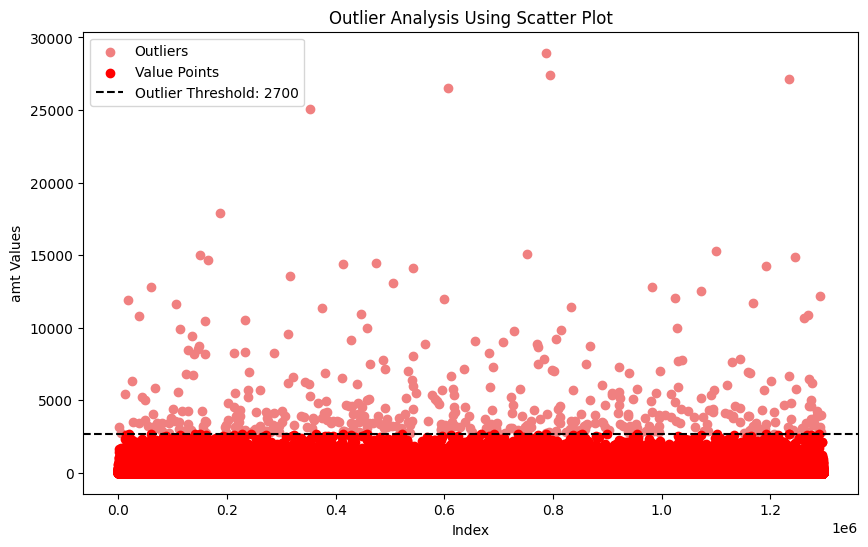

Number of outliers: 430
Outlier percentage: % 0.033161740605780164


In [21]:


outlier_threshold = 2700
outliers = data['amt'] > outlier_threshold
outlier_count = np.count_nonzero(outliers)
total_count = len(data)
outlier_percentage = (outlier_count / total_count) * 100

plt.figure(figsize=(10, 6))
plt.scatter(data.index[outliers], data['amt'][outliers], color='lightcoral', label='Outliers')
plt.scatter(data.index[~outliers], data['amt'][~outliers], color='red', label='Value Points')
plt.axhline(y=outlier_threshold, color='black', linestyle='--', label=f'Outlier Threshold: {outlier_threshold}')
plt.title('Outlier Analysis Using Scatter Plot')
plt.xlabel('Index')
plt.ylabel('amt Values')
plt.legend()
plt.show()


print(f'Number of outliers: {outlier_count}')
print(f'Outlier percentage: % {outlier_percentage}')



remove all records where the amt value is greater than 2700. Only 430 entries will be lost, resulting in a 0.03% data loss. Given the dataset's size, this is not considered a significant loss of data.

Dropping Unnecessary Features

Let's remove the following columns, as they are not necessary for training our model.

    Unnamed: 0 - It's a unique number similar to an index, which is meaningless for training purposes.
    first - The cardholder's first and last names are irrelevant for training purposes.
    last - The cardholder's first and last names are irrelevant for training purposes.
    street - Since we already have lat and lon information, we don't need the data in these columns.
    city - Since we already have lat and lon information, we don't need the data in these columns.
    state - Since we already have lat and lon information, we don't need the data in these columns.
    zip - Since we already have lat and lon information, we don't need the data in these columns.
    trans_num - It's a unique number for each transaction, which is meaningless for training purposes.
    unix_time - We can get the same information from 'trans_date_trans_time' column.
    merch_zipcode - Since we already have lat and lon information, we don't need the data in these columns.


In [22]:


to_drop = ['Unnamed: 0', 'first', 'last', 'street', 'city', 'state', 'zip', 'trans_num','unix_time','merch_zipcode']
data = data.drop(columns=to_drop)



 Feature Creation

We need to create the trans_year, trans_month, trans_day, trans_season, trans_weekday, trans_hour, trans_minute, and trans_second columns using the trans_date_trans_time column. Afterwards, we can remove the trans_date_trans_time column.

In [23]:
data['trans_date_trans_time'] = pd.to_datetime(data['trans_date_trans_time'])
data['trans_year'] = data['trans_date_trans_time'].dt.year
data['trans_month'] = data['trans_date_trans_time'].dt.month
data['trans_day'] = data['trans_date_trans_time'].dt.day
data['trans_season'] = data['trans_date_trans_time'].dt.month % 12 // 3 + 1  #1 = Winter, 2 = Spring, 3 = Summer, 4 = Autumn
data['trans_weekday'] = data['trans_date_trans_time'].dt.weekday
data['trans_hour'] = data['trans_date_trans_time'].dt.hour
data['trans_minute'] = data['trans_date_trans_time'].dt.minute
data['trans_second'] = data['trans_date_trans_time'].dt.second

data = data.drop(columns=['trans_date_trans_time'])



Now, let's calculate the cardholder's age at the time the transaction occurred.


In [24]:
data['dob'] = pd.to_datetime(data['dob'])
data['birth_year'] = data['dob'].dt.year
data['card_holder_age'] = data['trans_year'] - data['birth_year']
data = data.drop(columns=['dob', 'birth_year'])

In [25]:
data.head(3)

,cc_num,merchant,category,amt,gender,lat,long,city_pop,job,merch_lat,...,is_fraud,trans_year,trans_month,trans_day,trans_season,trans_weekday,trans_hour,trans_minute,trans_second,card_holder_age
0,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,36.0788,-81.1781,3495,"Psychologist, counselling",36.011293,...,0,2019,1,1,1,1,0,0,18,31
1,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,48.8878,-118.2105,149,Special educational needs teacher,49.159047,...,0,2019,1,1,1,1,0,0,44,41
2,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,M,42.1808,-112.2620,4154,Nature conservation officer,43.150704,...,0,2019,1,1,1,1,0,0,51,57


calculate the geographical distance between two points using their latitude and longitude coordinates using geopy library. The geopy library simplifies calculating geographical distances between points with high precision by providing easy-to-use methods that account for the Earth's curvature.

In [26]:
from geopy.distance import geodesic

def calculate_distance(row):
    point_a = (row['lat'], row['long'])
    point_b = (row['merch_lat'], row['merch_long'])
    return geodesic(point_a, point_b).kilometers

data['distance'] = data.apply(calculate_distance, axis=1)

Encoding

Using LabelEncoder to convert categorical features into numerical values for model training.

In [27]:
from sklearn.preprocessing import LabelEncoder
def encode_categorical_columns(data, columns):
    le = LabelEncoder()
    for col in columns:
        data[col] = le.fit_transform(data[col])
    return data

cat_features = ['cc_num', 'merchant', 'category', 'gender', 'job']
data = encode_categorical_columns(data, cat_features)
data.head()

,cc_num,merchant,category,amt,gender,lat,long,city_pop,job,merch_lat,...,trans_year,trans_month,trans_day,trans_season,trans_weekday,trans_hour,trans_minute,trans_second,card_holder_age,distance
0,444,514,8,4.97,0,36.0788,-81.1781,3495,370,36.011293,...,2019,1,1,1,1,0,0,18,31,78.773821
1,42,241,4,107.23,0,48.8878,-118.2105,149,428,49.159047,...,2019,1,1,1,1,0,0,44,41,30.216618
2,237,390,0,220.11,1,42.1808,-112.2620,4154,307,43.150704,...,2019,1,1,1,1,0,0,51,57,108.102912
3,509,360,2,45.00,1,46.2306,-112.1138,1939,328,47.034331,...,2019,1,1,1,1,0,1,16,52,95.685115
4,368,297,9,41.96,1,38.4207,-79.4629,99,116,38.674999,...,2019,1,1,1,1,0,3,6,33,77.702395


Splitting Data Into Train and Test Sets

In [29]:
X = data.drop('is_fraud', axis=1)
y = data['is_fraud']
# Assuming X (features) and y (target) are already defined
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1881)

# Calculate class weights
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y), y=y)
class_weights_dict = dict(enumerate(class_weights))


Splitting Data Into Train and Test Sets

In [55]:
# Let's split the data into training and test sets. To maintain class imbalance in both sets, I will use the stratify parameter during the split.

Modelling

Here,  specifically defined the CatBoost, XGBooost, and LightGBM models.  tried to optimize the hyperparameters of the models beforehand using Optuna. Later, by tweaking the model's hyperparameters, it may be possible to improve the model's performance.

 defined the class_weights object to ensure that each class is equally considered by the model in a dataset with imbalanced class distribution. The compute_class_weight function calculates weights based on class frequencies, and these weights are converted into a dictionary. This dictionary is used in the parameters of the CatBoostClassifier, XGBClassifier, and LGBMClassifier models to give more importance to underrepresented classes during the learning process. This approach helps mitigate the negative effects of class imbalance and enhances the overall performance of the model.

In [2]:
!pip install catboost xgboost lightgbm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import confusion_matrix, classification_report
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 6.7 MB/s eta 0:00:00


In [41]:
# Assuming X (features) and y (target) are already defined
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1881)

# Calculate class weights
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y), y=y)
class_weights_dict = dict(enumerate(class_weights))


4. Train CatBoost Classifier

In [44]:
cat_model = CatBoostClassifier(
    depth=10,
    learning_rate=0.2,
    n_estimators=2000,
    min_child_samples=10,
    subsample=0.7,
    l2_leaf_reg=8,
    cat_features=cat_features,  # Define categorical features if applicable
    random_state=1881,
    eval_metric='F1',
    loss_function='Logloss',
    bootstrap_type='Bernoulli',
    class_weights=class_weights_dict,
    task_type='GPU',
    verbose=False
)

cat_model.fit(X_train, y_train)


Prediction & Confusion Matrix

CatBoost Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    257953
           1       0.93      0.90      0.92      1382

    accuracy                           1.00    259335
   macro avg       0.96      0.95      0.96    259335
weighted avg       1.00      1.00      1.00    259335



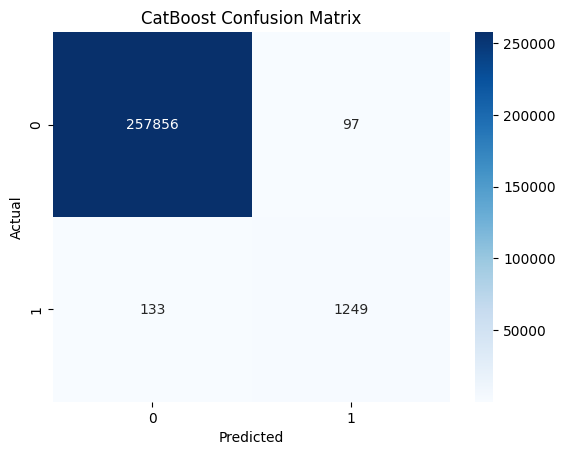

In [45]:
y_pred_cat = cat_model.predict(X_test)
cm_cat = confusion_matrix(y_test, y_pred_cat)

print("CatBoost Classification Report:")
print(classification_report(y_test, y_pred_cat))

sns.heatmap(cm_cat, annot=True, fmt='d', cmap='Blues')
plt.title('CatBoost Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


XGBoost Model
Train XGBoost Classifier

In [46]:
xgb_model = XGBClassifier(
    max_depth=7,
    learning_rate=0.2,
    n_estimators=2000,
    min_child_weight=10,
    subsample=0.8,
    reg_lambda=1,
    reg_alpha=3,
    scale_pos_weight=class_weights_dict[1] / class_weights_dict[0],
    objective='binary:logistic',
    eval_metric='logloss',
    tree_method='gpu_hist',
    random_state=1881,
    verbose=False
)

xgb_model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.2, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
              max_leaves=None, min_child_weight=10, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=2000,
              n_jobs=None, num_parallel_tree=None, random_state=1881, ...)

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    257953
           1       0.89      0.90      0.90      1382

    accuracy                           1.00    259335
   macro avg       0.95      0.95      0.95    259335
weighted avg       1.00      1.00      1.00    259335



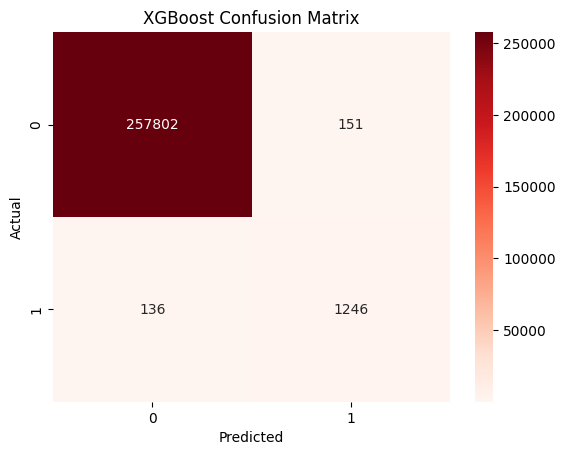

In [47]:
y_pred_xgb = xgb_model.predict(X_test)
cm_xgb = confusion_matrix(y_test, y_pred_xgb)

print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))

sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Reds')
plt.title('XGBoost Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


LightGBM Model

In [51]:
!apt-get update --fix-missing
!apt-get install -y --no-install-recommends opencl-headers ocl-icd-opencl-dev libopenblas-base libopenblas-dev
!pip install lightgbm --install-option=--opencl-include-dir=/usr/include/CL --install-option=--opencl-library=/usr/lib/x86_64-linux-gnu/libOpenCL.so

# Import necessary libraries
import lightgbm as lgb

lgbm_model = lgb.LGBMClassifier(
    max_depth=8,
    num_leaves=64,
    learning_rate=0.03,
    n_estimators=2000,
    min_child_weight=10,
    subsample=0.9,
    reg_lambda=3,
    reg_alpha=1,
    scale_pos_weight=class_weights_dict[1] / class_weights_dict[0],
    objective='binary',
    metric='binary_logloss',
    random_state=1881,
    #device="gpu",  # Remove or comment out this line to use CPU instead of GPU
    verbose=-1
)

lgbm_model.fit(X_train, y_train)

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Get:5 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:6 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:7 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Fetched 129 kB in 2s (67.2 kB/s)
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Don

LGBMClassifier(learning_rate=0.03, max_depth=8, metric='binary_logloss',
               min_child_weight=10, n_estimators=2000, num_leaves=64,
               objective='binary', random_state=1881, reg_alpha=1, reg_lambda=3,
               scale_pos_weight=171.75179856115105, subsample=0.9, verbose=-1)

LightGBM Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    257953
           1       0.86      0.92      0.89      1382

    accuracy                           1.00    259335
   macro avg       0.93      0.96      0.94    259335
weighted avg       1.00      1.00      1.00    259335



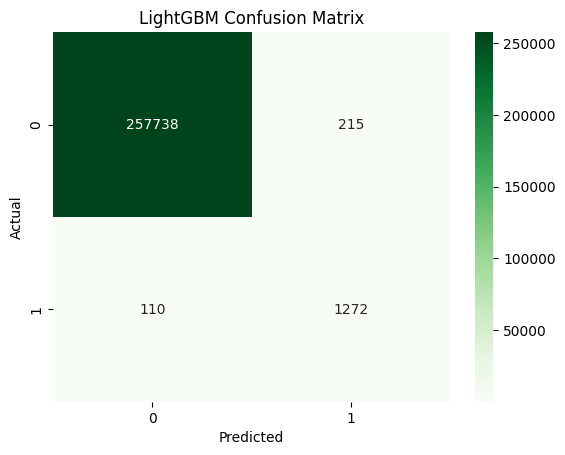

In [52]:
y_pred_lgbm = lgbm_model.predict(X_test)
cm_lgbm = confusion_matrix(y_test, y_pred_lgbm)

print("LightGBM Classification Report:")
print(classification_report(y_test, y_pred_lgbm))

sns.heatmap(cm_lgbm, annot=True, fmt='d', cmap='Greens')
plt.title('LightGBM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Metric Selection

As previously mentioned, our class variable has a highly imbalanced distribution, making the choice of evaluation metrics crucial for accurately assessing model performance. In this project, we will use the F1 Score, Precision, and Recall as our metrics to effectively capture the model's ability to identify the minority class while minimizing false positives and false negatives.

The F1 Score provides a balance between precision and recall, offering a single measure that reflects both the accuracy of the positive predictions and the model's completeness in identifying all relevant instances. Precision measures the proportion of true positive predictions among all positive predictions, indicating how many of the predicted positive cases are actually correct. Recall, on the other hand, assesses the model's ability to identify all relevant instances, representing the proportion of true positives among all actual positive cases. By utilizing these metrics, we can better evaluate our model's performance in the context of imbalanced classes.

Here, the training dataset is divided into 5 parts using stratified k-fold. Subsequently, the models are tested on each part, and the average F1 Score, Recall, and Precision values for each model are printed. This way, we gain insights into the performance of the models.

Feature Importances

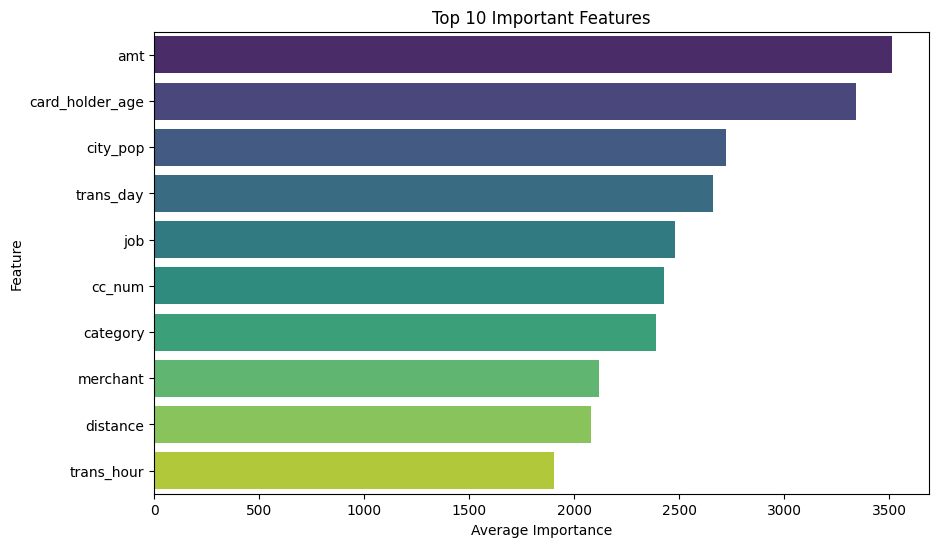

In [53]:
# Extract feature importance from each model
catboost_importance = cat_model.feature_importances_
xgboost_importance = xgb_model.feature_importances_
lgbm_importance = lgbm_model.feature_importances_

# Get feature names from the training set
feature_names = X_train.columns

# Create a DataFrame to store feature importances
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'CatBoost': catboost_importance,
    'XGBoost': xgboost_importance,
    'LGBM': lgbm_importance
})

# Compute the average importance score across all models
importance_df['Average'] = importance_df[['CatBoost', 'XGBoost', 'LGBM']].mean(axis=1)

# Select the top 10 most important features
top_features = importance_df.nlargest(10, 'Average')

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Average', y='Feature', data=top_features, palette='viridis')
plt.title('Top 10 Important Features')
plt.xlabel('Average Importance')
plt.ylabel('Feature')
plt.show()


In [56]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
print("y_train class distribution:")
print(y_train.value_counts(normalize=True))

print("\ny_test class distribution:")
print(y_test.value_counts(normalize=True))

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

y_train class distribution:
is_fraud
0    0.994096
1    0.005904
Name: proportion, dtype: float64

y_test class distribution:
is_fraud
0    0.994671
1    0.005329
Name: proportion, dtype: float64


In [57]:
input_dim = X_train.shape[1]

batch_size = 30000

latent_dim = 16

max_epochs = 20

In [59]:
from tensorflow.keras.layers import Input, Dense, Dropout
input_data = Input(shape=(input_dim,), name='encoder_input')

encoder = Dense(96,activation='tanh', name='encoder_1')(input_data)
encoder = Dropout(.2)(encoder)
encoder = Dense(64,activation='tanh', name='encoder_2')(input_data)
encoder = Dropout(.2)(encoder)
encoder = Dense(48,activation='tanh', name='encoder_3')(encoder)
encoder = Dropout(.2)(encoder)
encoder = Dense(32,activation='tanh', name='encoder_4')(encoder)
encoder = Dropout(.2)(encoder)
#encoder = Dense(16,activation='tanh', name='encoder_5')(encoder)
#encoder = Dropout(.2)(encoder)

latent_encoding = Dense(latent_dim, activation='linear', name='latent_encoding')(encoder)

In [61]:
from tensorflow.keras.models import Model
encoder_model = Model(input_data, latent_encoding)

In [62]:


#decoder = Dense(16, activation='tanh', name='decoder_1')(latent_encoding)
#decoder = Dropout(.2)(decoder)
decoder = Dense(32, activation='tanh', name='decoder_2')(latent_encoding)
decoder = Dropout(.2)(decoder)
decoder = Dense(48, activation='tanh', name='decoder_3')(decoder)
decoder = Dropout(.2)(decoder)
decoder = Dense(64, activation='tanh', name='decoder_4')(decoder)
decoder = Dropout(.2)(decoder)
decoder = Dense(96, activation='tanh', name='decoder_5')(decoder)
decoder = Dropout(.2)(decoder)

reconstructed_data = Dense(input_dim, activation='linear', name='reconstructed_data')(decoder)



In [63]:
autoencoder_model = Model(input_data, reconstructed_data)

In [65]:
from tensorflow.keras import optimizers
opt = optimizers.Adam(learning_rate=.001)
autoencoder_model.compile(optimizer=opt, loss='mse', metrics=['accuracy'])

In [66]:
train_history = autoencoder_model.fit(X_train, X_train,
        shuffle=True,
        epochs=max_epochs,
        batch_size=batch_size,
        validation_data=(X_test, X_test))

Epoch 1/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 17s 230ms/step - accuracy: 0.0971 - loss: 0.9993 - val_accuracy: 0.2708 - val_loss: 0.5643
Epoch 2/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.1805 - loss: 0.7274 - val_accuracy: 0.3099 - val_loss: 0.4315
Epoch 3/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.1977 - loss: 0.6406 - val_accuracy: 0.3288 - val_loss: 0.3807
Epoch 4/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.2049 - loss: 0.6015 - val_accuracy: 0.3323 - val_loss: 0.3613
Epoch 5/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2096 - loss: 0.5724 - val_accuracy: 0.3690 - val_loss: 0.3268
Epoch 6/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.2122 - loss: 0.5536 - val_accuracy: 0.3678 - val_loss: 0.3218
Epoch 7/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.2137 - loss: 0.5445 - val_accuracy: 0.3665 - val_loss: 0.3184
Epoch 8/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.2140 - loss: 0.5312 - val_accuracy: 0.3713 -

In [67]:


X_test_recon = autoencoder_model.predict(X_test)
reconstruction_scores = np.mean((X_test - X_test_recon)**2, axis=1)



8105/8105 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step


In [69]:
from sklearn.metrics import roc_curve, confusion_matrix
fpr, tpr, thresholds = roc_curve(y_test, reconstruction_scores)
optimal_threshold_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_threshold_idx]

thresh = optimal_threshold
pred_labels = (reconstruction_scores > thresh).astype(int)

results = confusion_matrix(y_test, pred_labels)

Confusion Matrix: 


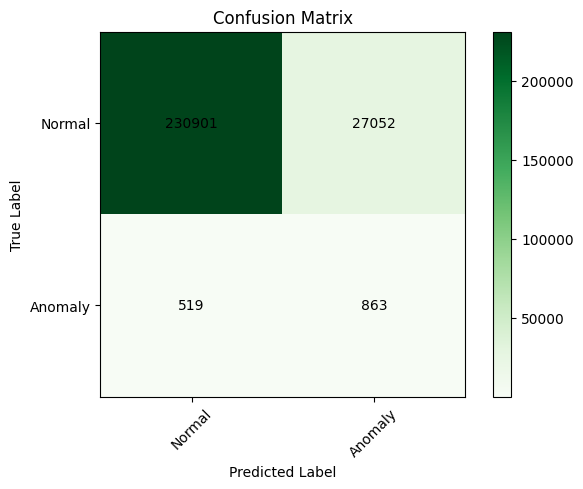

In [70]:
print ('Confusion Matrix: ')

def plot_confusion_matrix(cm, target_names, title='Confusion Matrix', cmap=plt.cm.Greens):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(target_names))
    plt.xticks(tick_marks, target_names, rotation=45)
    plt.yticks(tick_marks, target_names)
    plt.tight_layout()

    width, height = cm.shape

    for x in range(width):
        for y in range(height):
            plt.annotate(str(cm[x][y]), xy=(y, x),
                        horizontalalignment='center',
                        verticalalignment='center')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')


plot_confusion_matrix(results, ['Normal','Anomaly'])